## **Group Project**


##### **Title** : Yummy Or Dummy?
Angela Li, Phoebe Wu, Sarah Feng

##### **Methods and Results**

In [1]:
# Import required packages
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

In [2]:
# Read mushroom dataset from kaggle via URL
mushrooms_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

# rename columns for readability and ease of use
col_names = {
    "p": "class",
    "x": "cap_shape",
    "s": "cap_surface",
    "n": "cap_colour",
    "t": "bruises",
    "p.1": "odour",
    "f": "gill_attachment",
    "c": "gill_spacing",
    "n.1": "gill_size",
    "k": "gill_colour",
    "e": "stalk_shape",
    "e.1": "stalk_root",
    "s.1": "stalk_surface_above_ring",
    "s.2": "stalk_surface_below_ring",
    "w": "stalk_colour_above_ring",
    "w.1": "stalk_colour_below_ring",
    "p.2": "veil_type",
    "w.2": "veil_colour",
    "o": "ring_number",
    "p.3": "ring_type",
    "k.1": "spore_print_colour",
    "s.3": "population",
    "u": "habitat",
}
mushrooms_df = mushrooms_df.rename(columns=col_names)
mushrooms_df

,class,cap_shape,cap_surface,cap_colour,bruises,odour,gill_attachment,gill_spacing,gill_size,gill_colour,...,stalk_surface_below_ring,stalk_colour_above_ring,stalk_colour_below_ring,veil_type,veil_colour,ring_number,ring_type,spore_print_colour,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
mushrooms_df['class'] = mushrooms_df['class'].replace({
           'e' : 0,
           'p' : 1
        }).astype('int')
# mushrooms_df['cap_shape'] = mushrooms_df['cap_shape'].replace({
#            'b' : 'bell',
#            'c' : 'conical',
#            'x' : 'convex',
#            'f' : 'flat',
#            'k' : 'knobbed',
#            's' : 'sunken'
#         }).astype('category')
# mushrooms_df['cap_surface'] = mushrooms_df['cap_surface'].replace({
#            'g' : 'grooves',
#            'y' : 'scaly',
#            'f' : 'fibrous',
#            's' : 'smooth'
#         }).astype('category')
# mushrooms_df['cap_colour'] = mushrooms_df['cap_colour'].replace({
#            'n' : 'brown',
#            'b' : 'buff',
#            'c' : 'cinnamon',
#            'g' : 'gray',
#            'r' : 'green',
#            'p' : 'pink',
#            'u' : 'purple',
#            'e' : 'red',
#            'w' : 'white',
#            'y' : 'yellow'
#         }).astype('category')
# mushrooms_df['bruises'] = mushrooms_df['bruises'].replace({
#            't' : 'true',
#            'f' : 'false'
#         }).astype('category')
mushrooms_df

,class,cap_shape,cap_surface,cap_colour,bruises,odour,gill_attachment,gill_spacing,gill_size,gill_colour,...,stalk_surface_below_ring,stalk_colour_above_ring,stalk_colour_below_ring,veil_type,veil_colour,ring_number,ring_type,spore_print_colour,population,habitat
0,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,0,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
train_df, test_df = train_test_split(mushrooms_df, test_size=0.25, random_state=123)
train_df.head()

,class,cap_shape,cap_surface,cap_colour,bruises,odour,gill_attachment,gill_spacing,gill_size,gill_colour,...,stalk_surface_below_ring,stalk_colour_above_ring,stalk_colour_below_ring,veil_type,veil_colour,ring_number,ring_type,spore_print_colour,population,habitat
6576,1,f,s,n,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,l
6281,1,x,y,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d
6273,1,f,s,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
4938,0,k,s,b,t,n,f,c,b,w,...,s,e,w,p,w,t,e,w,c,w
6874,1,f,s,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l


In [5]:
train_df.describe()

,class
count,6092.000000
mean,0.482928
std,0.499749
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
X_train = train_df.drop(columns=["class"])
y_train = train_df["class"]

X_test = test_df.drop(columns=["class"])
y_test = test_df["class"]

In [7]:
alt.data_transformers.disable_max_rows()
alt.Chart(X_train).mark_bar().encode(
        x=alt.X(alt.repeat('repeat')),
        y="count()",
    ).properties(
        width=200,
        height=200
    ).repeat(
        repeat= list(X_train.columns), 
        columns=5
    )

alt.RepeatChart(...)

In [ ]:
X_tt, X_valid, y_tt, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [8]:
categorical_feats = ["cap_shape", "cap_surface", "cap_colour", "odour", "gill_colour", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring", "stalk_colour_above_ring", "stalk_colour_below_ring", "veil_colour", "ring_type", "spore_print_colour", "population", "habitat"]
ordinal_feats = ["ring_number"]
binary_feats = ["bruises", "gill_attachment", "gill_spacing", "gill_size", "stalk_shape"]
drop_feats = ["veil_type"]

In [9]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_feats),
    (OrdinalEncoder(categories=[["n", "o", "t"]]), ordinal_feats),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_feats),
    ("drop", drop_feats),
)
ct

ColumnTransformer(transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['cap_shape', 'cap_surface', 'cap_colour',
                                  'odour', 'gill_colour', 'stalk_root',
                                  'stalk_surface_above_ring',
                                  'stalk_surface_below_ring',
                                  'stalk_colour_above_ring',
                                  'stalk_colour_below_ring', 'veil_colour',
                                  'ring_type', 'spore_print_colour',
                                  'population', 'habitat']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['n', 'o', 't']]),
                                 ['ring_number']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['bruises', 'gill_attachment', 'gill_spacing',
                                  'gill_size', 'stalk_shape']),
                                ('drop', 'drop', ['veil_type'])])

In [10]:
ct.fit(X_train)
ct.named_transformers_

{'onehotencoder-1': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'ordinalencoder': OrdinalEncoder(categories=[['n', 'o', 't']]),
 'onehotencoder-2': OneHotEncoder(drop='if_binary', dtype=<class 'int'>),
 'drop': 'drop'}

In [123]:
column_names = (
    ordinal_feats + binary_feats + ct.named_transformers_["onehotencoder-1"].get_feature_names_out().tolist()
)

In [12]:
X_train_enc = pd.DataFrame(
    ct.transform(X_train), index = X_train.index, columns=column_names
)
X_train_enc

,ring_number,bruises,gill_attachment,gill_spacing,gill_size,stalk_shape,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6576,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
6281,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
6273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
6874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1346,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3454,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
7533,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0


In [155]:
results = {}
scoring = ["accuracy", "recall"]
scores = cross_validate(knn, X_train_enc, y_train, return_train_score=True, scoring=scoring)
results["all"] = pd.DataFrame(scores).mean()

In [156]:
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
all,0.002904,0.02734,0.999672,0.999918,0.99932,0.99983


In [132]:
feature_names = categorical_feats + binary_feats + ordinal_feats

In [157]:
feat_results = {}
for feature in feature_names:
    X_col_enc = []
    for column in column_names:
        if column.startswith(feature):
            X_col_enc.append(column)
    print(X_col_enc)
    X_train_subset = X_train_enc[X_col_enc]
    X_train_subset
    scores = cross_validate(knn, X_train_subset, y_train, return_train_score=True, scoring=scoring)
    feat_results[feature] = pd.DataFrame(scores).mean()

['cap_shape_b', 'cap_shape_c', 'cap_shape_f', 'cap_shape_k', 'cap_shape_s', 'cap_shape_x']
['cap_surface_f', 'cap_surface_g', 'cap_surface_s', 'cap_surface_y']
['cap_colour_b', 'cap_colour_c', 'cap_colour_e', 'cap_colour_g', 'cap_colour_n', 'cap_colour_p', 'cap_colour_r', 'cap_colour_u', 'cap_colour_w', 'cap_colour_y']
['odour_a', 'odour_c', 'odour_f', 'odour_l', 'odour_m', 'odour_n', 'odour_p', 'odour_s', 'odour_y']
['gill_colour_b', 'gill_colour_e', 'gill_colour_g', 'gill_colour_h', 'gill_colour_k', 'gill_colour_n', 'gill_colour_o', 'gill_colour_p', 'gill_colour_r', 'gill_colour_u', 'gill_colour_w', 'gill_colour_y']
['stalk_root_?', 'stalk_root_b', 'stalk_root_c', 'stalk_root_e', 'stalk_root_r']
['stalk_surface_above_ring_f', 'stalk_surface_above_ring_k', 'stalk_surface_above_ring_s', 'stalk_surface_above_ring_y']
['stalk_surface_below_ring_f', 'stalk_surface_below_ring_k', 'stalk_surface_below_ring_s', 'stalk_surface_below_ring_y']
['stalk_colour_above_ring_b', 'stalk_colour_above_r

In [159]:
feat_results_df = pd.DataFrame(feat_results).T.sort_values(by = "test_recall", ascending=False)
feat_results_df

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
cap_colour,0.001719,0.043628,0.989495,0.989494,0.978247,0.978246
habitat,0.001875,0.032102,0.938939,0.939757,0.900408,0.900750
stalk_surface_below_ring,0.001578,0.037046,0.588640,0.585521,0.826486,0.822014
cap_shape,0.001717,0.024185,0.538399,0.537880,0.812491,0.812172
gill_size,0.001265,0.029505,0.492938,0.493558,0.800000,0.800000
bruises,0.001472,0.032824,0.489491,0.489741,0.799660,0.799915
ring_type,0.001617,0.021484,0.822730,0.824398,0.792067,0.797308
ring_number,0.001261,0.027827,0.525117,0.526387,0.790481,0.790823
stalk_colour_above_ring,0.002139,0.030608,0.646077,0.644784,0.763253,0.763897
gill_spacing,0.001335,0.026740,0.472741,0.471440,0.743192,0.738742


In [137]:
feature_importances = list(feat_results_df.index)

In [161]:
X_imp = feature_importances[:1]
X_imp

['cap_colour']

In [162]:
X_col_enc = []
for column in column_names:
    if column.startswith(tuple(X_imp)):
        X_col_enc.append(column)
print(X_col_enc)
X_train_subset = X_train_enc[X_col_enc]
X_train_subset


['cap_colour_b', 'cap_colour_c', 'cap_colour_e', 'cap_colour_g', 'cap_colour_n', 'cap_colour_p', 'cap_colour_r', 'cap_colour_u', 'cap_colour_w', 'cap_colour_y']


,cap_colour_b,cap_colour_c,cap_colour_e,cap_colour_g,cap_colour_n,cap_colour_p,cap_colour_r,cap_colour_u,cap_colour_w,cap_colour_y
6576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6281,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6874,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [168]:
new_results = {}

In [169]:
scores = cross_validate(knn, X_train_subset, y_train, return_train_score=True, scoring=scoring)
new_results["cap_colour"] = pd.DataFrame(scores).mean()

In [170]:
pd.DataFrame(new_results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
cap_colour,0.001917,0.044054,0.989495,0.989494,0.978247,0.978246


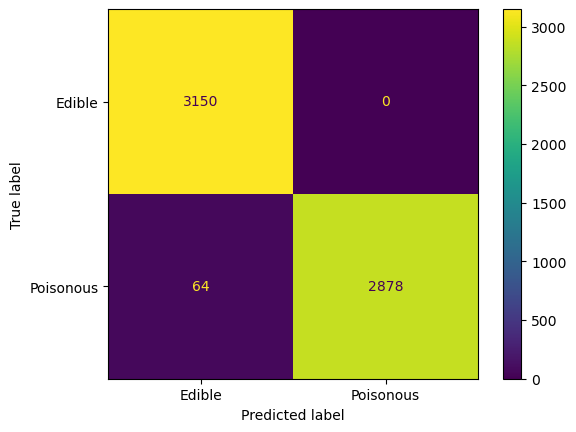

In [171]:
knn.fit(X_train_subset, y_train)
confusion = ConfusionMatrixDisplay.from_estimator(
    knn, X_train_subset, y_train, display_labels = ["Edible", "Poisonous"]
)